# Assignment 3
## AndrewID : Sadeniji

### Loan Status Prediction Using Machine Learning



## Overview:

* Apply data cleaning, feature engineering, and encoding techniques.
* Train and evaluate multiple classification models.
* Interpret results using performance metrics and explainability tools.
* Reflect on ethical implications and bias detection in modeling.


In [1]:
# Importing all needed libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
import shap # type: ignore
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

C:\Users\ifeol\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Task 1

* After loading and exploring the dataset, analyze the structure and
distribution of the data.
* What types of variables are present in the dataset (categorical,
numerical, etc.)?
* Which numerical features show evidence of skewness or non-normal
distribution?
- For numerical features calculate skewness, kurtosis values and draw the histograms to identify 
their distributions and comments on the results.
- Explain why transforming skewed variables might be necessary before modeling
* Based on your analysis, explain why transforming skewed variables
might be necessary before modeling.
* Describe the potential challenges of combining categorical and
numerical features in one predictive model.

### Deliverables:
* Graphs and insights
* Numerical values, and qualitative answers



In [2]:
# Loading the dataset and providing some summary statistics and other information
sadeniji_loan_data = pd.read_csv("Loan Status Prediction.csv")
# to print the basic information about the dataset
print(sadeniji_loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [3]:
# Summary statistics of the dataset
print(sadeniji_loan_data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [4]:
# Display the first few rows of the dataset
print(sadeniji_loan_data.shape)

(614, 13)


In [5]:
# check for missing values and print the numners
missing_values = sadeniji_loan_data.isnull().sum()
print(missing_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Identifying numerical variables
numerical_variables = sadeniji_loan_data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Variables:", numerical_variables)
print()
categorical_variables = sadeniji_loan_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)

Numerical Variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical Variables: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
# calcuate the skewness of numerical variables
skewness = sadeniji_loan_data[numerical_variables].skew()

# kurtosis of numerical variables
kurtosis = sadeniji_loan_data[numerical_variables].kurtosis()

print("Skewness of Numerical Variables:\n", skewness)
print()
print("Kurtosis of Numerical Variables:\n", kurtosis)

Skewness of Numerical Variables:
 ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Kurtosis of Numerical Variables:
 ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64


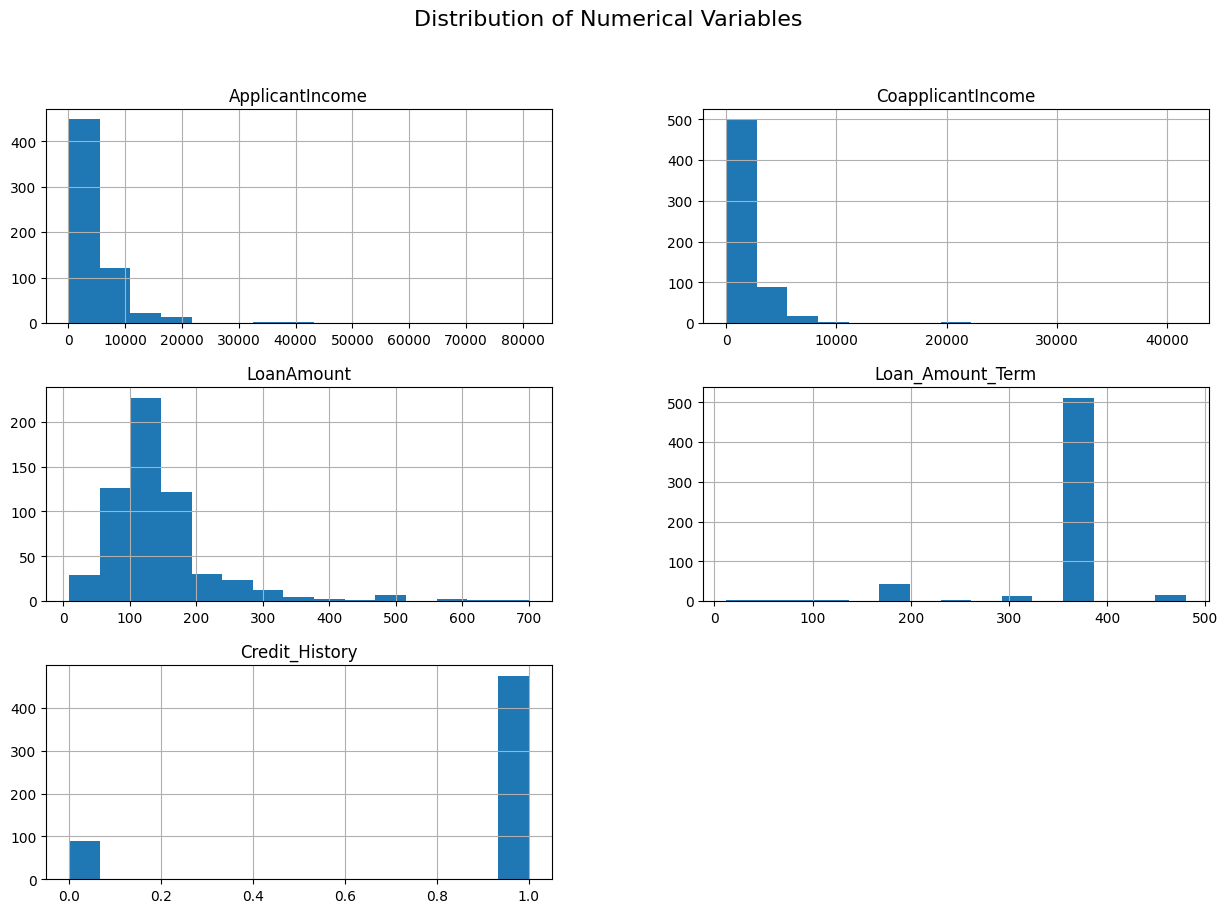

In [8]:
# Plot histogram to show the distribution of numerical variables
sadeniji_loan_data[numerical_variables].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

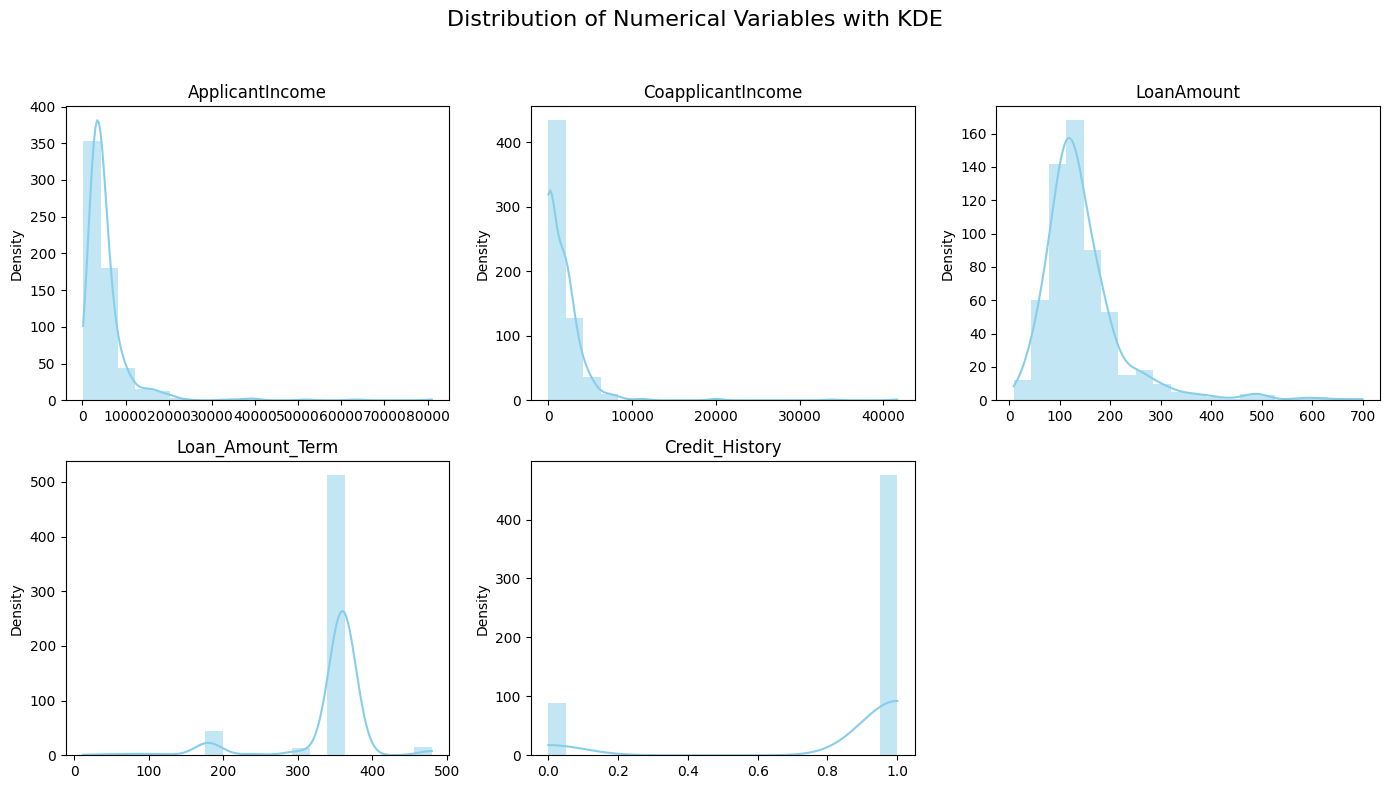

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce figure resolution if your data is large
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
axes = axes.flatten()

# Limit the number of bins for faster rendering
for i, col in enumerate(numerical_variables):
    sns.histplot(
        sadeniji_loan_data[col],
        bins=20,          # small number of bins for speed
        kde=True,         # include KDE
        ax=axes[i],
        color='skyblue',
        edgecolor=None
    )
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Hide empty subplot if number of variables < number of subplots
for j in range(len(numerical_variables), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribution of Numerical Variables with KDE", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Question 2

* Find the missing values in each variable as percentage of total dataset length
* Use IQR or Z-score to identify number of outliers as percentage of total dataset 
length, explain the reason for your choice.
* Plot the boxplot of the numerical variables
* Carefully Examine which variables that need to be handled and remove outliers 
where necessary
* Plot boxplot after removing the outliers and comments on the results
* Reflect on how your choices affect the data distribution and what biases could be
introduced when filling in missing categorical values

### Deliverables

* Tables 
* Graohs and Qualitative Answers

In [10]:
# print the percentage of missing values in each column
missing_percentage = sadeniji_loan_data.isnull().mean() * 100
# convert numbers to formatted strings before concatenating the percent sign
print(missing_percentage.round(2).map(lambda x: f"{x:.2f}%"))

Loan_ID              0.00%
Gender               2.12%
Married              0.49%
Dependents           2.44%
Education            0.00%
Self_Employed        5.21%
ApplicantIncome      0.00%
CoapplicantIncome    0.00%
LoanAmount           3.58%
Loan_Amount_Term     2.28%
Credit_History       8.14%
Property_Area        0.00%
Loan_Status          0.00%
dtype: object


In [11]:
# imputing missing values
# filling the ApplicantIncome, CoapplicantIncome, LoanAmount with median values
sadeniji_loan_data['ApplicantIncome'].fillna(sadeniji_loan_data['ApplicantIncome'].median(), inplace=True)
sadeniji_loan_data['CoapplicantIncome'].fillna(sadeniji_loan_data['CoapplicantIncome'].median(), inplace=True)
sadeniji_loan_data['LoanAmount'].fillna(sadeniji_loan_data['LoanAmount'].median(), inplace=True)

# fill all the categorical columns with mode
categorical_columns = sadeniji_loan_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    sadeniji_loan_data[col].fillna(sadeniji_loan_data[col].mode()[0], inplace=True)
    

C:\Users\ifeol\AppData\Local\Temp\ipykernel_26268\2464057663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sadeniji_loan_data['ApplicantIncome'].fillna(sadeniji_loan_data['ApplicantIncome'].median(), inplace=True)
C:\Users\ifeol\AppData\Local\Temp\ipykernel_26268\2464057663.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [12]:
# check for missing values and print the numners
missing_values = sadeniji_loan_data.isnull().sum()
print(missing_values)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [13]:
# remove non-numeric / categorical columns from the numerical_variables list
numerical_variables = [col for col in numerical_variables if col not in ['Loan_Amount_Term', 'Credit_History']]

print(numerical_variables)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [14]:
# Use IQR or Z-score to identify number of outliers as percentage of total dataset length, explain the reason for your choice.

# Using IQR method to identify outliers
Q1 = sadeniji_loan_data[numerical_variables].quantile(0.25)
Q3 = sadeniji_loan_data[numerical_variables].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((sadeniji_loan_data[numerical_variables] < (Q1 - 1.5 * IQR)) | (sadeniji_loan_data[numerical_variables] > (Q3 + 1.5 * IQR))).sum()
outlier_percentage_iqr = (outliers_iqr.sum() / sadeniji_loan_data.shape[0]) * 100
print(f"Percentage of outliers in the dataset using IQR method: {outlier_percentage_iqr:.2f}%")

Percentage of outliers in the dataset using IQR method: 17.75%


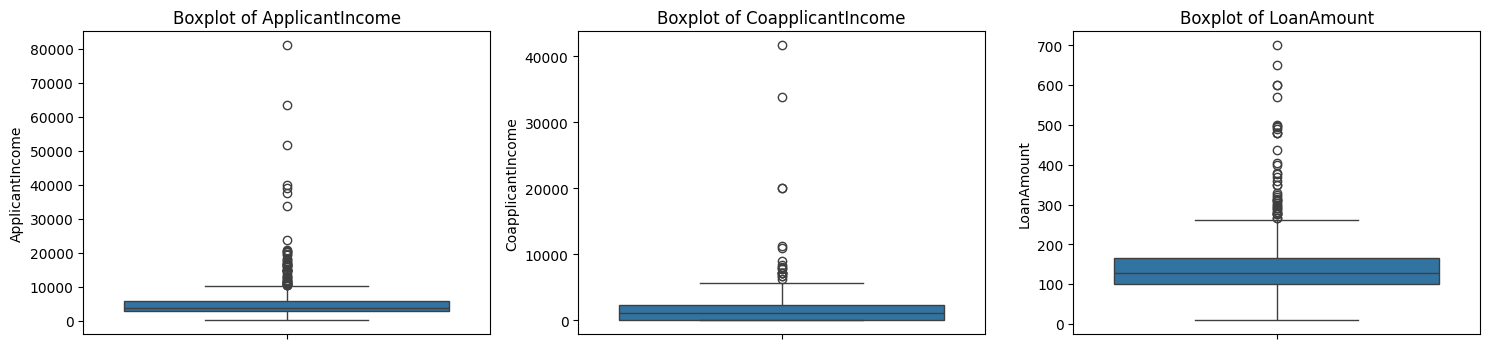

In [15]:
# Plotting the boxplots for numerical variables to visualize outliers
# plot each numerical variable in a boxplot so that scale is maintained
# Plot them side by side on a single figure
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=sadeniji_loan_data[var])
    plt.title(f"Boxplot of {var}")  
plt.tight_layout()
plt.show()

In [16]:
sadeniji_loan_data["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [17]:
# Print the values of the outliers for each numerical variable
for var in numerical_variables:
    Q1 = sadeniji_loan_data[var].quantile(0.25)
    Q3 = sadeniji_loan_data[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = sadeniji_loan_data[(sadeniji_loan_data[var] < (Q1 - 1.5 * IQR)) | (sadeniji_loan_data[var] > (Q3 + 1.5 * IQR))][var]
    print(f"Outliers in {var}:\n", outliers.values)
    print()

Outliers in ApplicantIncome:
 [12841 12500 11500 10750 13650 11417 14583 10408 23803 10513 20166 14999
 11757 14866 39999 51763 33846 39147 12000 11000 16250 14683 11146 14583
 20667 20233 15000 63337 19730 15759 81000 14880 12876 10416 37719 16692
 16525 16667 10833 18333 17263 20833 13262 17500 11250 18165 19484 16666
 16120 12000]

Outliers in CoapplicantIncome:
 [10968.  8106.  7210.  8980.  7750. 11300.  7250.  7101.  6250.  7873.
 20000. 20000.  8333.  6667.  6666.  7166. 33837. 41667.]

Outliers in LoanAmount:
 [267. 349. 315. 320. 286. 312. 265. 370. 650. 290. 600. 275. 700. 495.
 280. 279. 304. 330. 436. 480. 300. 376. 490. 308. 570. 380. 296. 275.
 360. 405. 500. 480. 311. 480. 400. 324. 600. 275. 292. 350. 496.]



In [18]:
# removing outliers using IQR method for Applicant Income, Coapplicant Income, and Loan Amount
# using a function that uses IQR to handle outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to the relevant columns
sadeniji_loan_data = remove_outliers_iqr(sadeniji_loan_data, 'ApplicantIncome')
sadeniji_loan_data = remove_outliers_iqr(sadeniji_loan_data, 'CoapplicantIncome')
sadeniji_loan_data = remove_outliers_iqr(sadeniji_loan_data, 'LoanAmount')


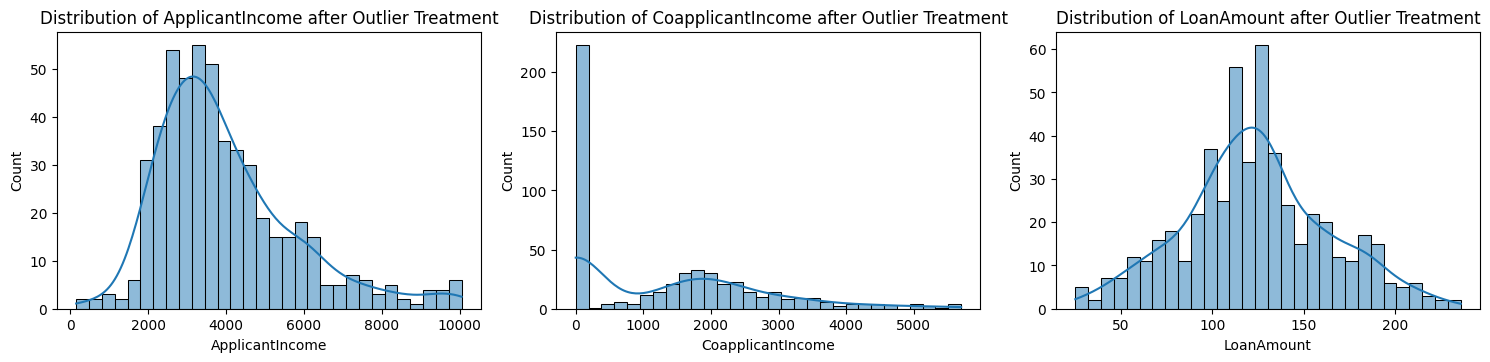

In [19]:
# Visualizing the effect of outlier treatment
# Plot histogram to show the distribution of numerical variables after outlier treatment
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sadeniji_loan_data[var], bins=30, kde=True)
    plt.title(f"Distribution of {var} after Outlier Treatment")
plt.tight_layout()
plt.show()

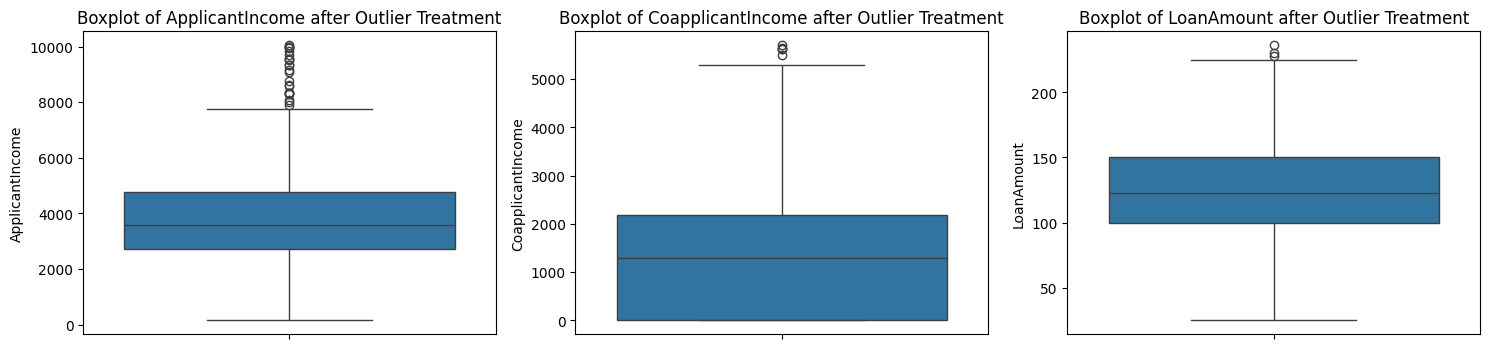

In [20]:
# Box plots after outlier treatment
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=sadeniji_loan_data[var])
    plt.title(f"Boxplot of {var} after Outlier Treatment")
plt.tight_layout()
plt.show()

## Question 3

* Differentiate between Label Encoding and One-Hot Encoding,
considering their trade-offs for different types of categorical variables.
* Differentiate the following scaling methods: Min-Max Scaling
(Normalization), Standardization (Z-score Scaling), Robust Scaling,
Unit Vector Scaling (L2 Norm Scaling)

* Explore the dataset and create new features that could enhance loan
prediction, such as a feature representing total income and another
indicating the loan amount per income.
* Transform the skewed variables and discrete numerical variables using
appropriate methods, as well as categorical variables according to their
type, for better modeling results.
* Plot the annotated heatmap of the Pearson correlation coefficient
between independent variables and comments on the results.
* Drop the irrelevant variables and use the appropriate scaling method on
the independent variables.

In [21]:
# show missing values after outlier treatment
missing_percentage_after_outlier_treatment = sadeniji_loan_data.isnull().mean() * 100
# convert numbers to formatted strings before concatenating the percent sign    
print(missing_percentage_after_outlier_treatment.round(2).map(lambda x: f"{x:.2f}%"))

Loan_ID              0.00%
Gender               0.00%
Married              0.00%
Dependents           0.00%
Education            0.00%
Self_Employed        0.00%
ApplicantIncome      0.00%
CoapplicantIncome    0.00%
LoanAmount           0.00%
Loan_Amount_Term     2.69%
Credit_History       7.88%
Property_Area        0.00%
Loan_Status          0.00%
dtype: object


In [22]:
# converting Loan_Amount_Term and Credit_History to categorical variables
sadeniji_loan_data['Loan_Amount_Term'] = sadeniji_loan_data['Loan_Amount_Term'].astype('category')
sadeniji_loan_data['Credit_History'] = sadeniji_loan_data['Credit_History'].astype('category')

# fill the missing values in the categorical columns again after outlier treatment
categorical_columns = sadeniji_loan_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    sadeniji_loan_data[col].fillna(sadeniji_loan_data[col].mode()[0], inplace=True)

C:\Users\ifeol\AppData\Local\Temp\ipykernel_26268\396579649.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sadeniji_loan_data[col].fillna(sadeniji_loan_data[col].mode()[0], inplace=True)


In [23]:
# show missing values after outlier treatment
missing_percentage_after_outlier_treatment = sadeniji_loan_data.isnull().mean() * 100
# convert numbers to formatted strings before concatenating the percent sign    
print(missing_percentage_after_outlier_treatment.round(2).map(lambda x: f"{x:.2f}%"))

Loan_ID              0.00%
Gender               0.00%
Married              0.00%
Dependents           0.00%
Education            0.00%
Self_Employed        0.00%
ApplicantIncome      0.00%
CoapplicantIncome    0.00%
LoanAmount           0.00%
Loan_Amount_Term     0.00%
Credit_History       0.00%
Property_Area        0.00%
Loan_Status          0.00%
dtype: object


In [24]:
# creating the total income variable by summing applicant and coapplicant income
sadeniji_loan_data['TotalIncome'] = sadeniji_loan_data['ApplicantIncome'] + sadeniji_loan_data['CoapplicantIncome']

sadeniji_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            520 non-null    object  
 1   Gender             520 non-null    object  
 2   Married            520 non-null    object  
 3   Dependents         520 non-null    object  
 4   Education          520 non-null    object  
 5   Self_Employed      520 non-null    object  
 6   ApplicantIncome    520 non-null    int64   
 7   CoapplicantIncome  520 non-null    float64 
 8   LoanAmount         520 non-null    float64 
 9   Loan_Amount_Term   520 non-null    category
 10  Credit_History     520 non-null    category
 11  Property_Area      520 non-null    object  
 12  Loan_Status        520 non-null    object  
 13  TotalIncome        520 non-null    float64 
dtypes: category(2), float64(3), int64(1), object(8)
memory usage: 54.3+ KB


In [25]:
# Create a new feature called loan per income ratio
sadeniji_loan_data['LoanPerIncome'] = sadeniji_loan_data['LoanAmount'] / sadeniji_loan_data['TotalIncome'].replace(0, np.nan)



In [26]:
sadeniji_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            520 non-null    object  
 1   Gender             520 non-null    object  
 2   Married            520 non-null    object  
 3   Dependents         520 non-null    object  
 4   Education          520 non-null    object  
 5   Self_Employed      520 non-null    object  
 6   ApplicantIncome    520 non-null    int64   
 7   CoapplicantIncome  520 non-null    float64 
 8   LoanAmount         520 non-null    float64 
 9   Loan_Amount_Term   520 non-null    category
 10  Credit_History     520 non-null    category
 11  Property_Area      520 non-null    object  
 12  Loan_Status        520 non-null    object  
 13  TotalIncome        520 non-null    float64 
 14  LoanPerIncome      520 non-null    float64 
dtypes: category(2), float64(4), int64(1), object(8)
memory usage: 

In [27]:
numerical_variables = sadeniji_loan_data.select_dtypes(include=[np.number]).columns.tolist()
# calculating skewness after outlier treatment for numerical variables
skewness_after_outlier_treatment = sadeniji_loan_data[numerical_variables].skew()
print("Skewness of Numerical Variables after Outlier Treatment:\n", skewness_after_outlier_treatment)

Skewness of Numerical Variables after Outlier Treatment:
 ApplicantIncome      1.169844
CoapplicantIncome    0.813900
LoanAmount           0.141491
TotalIncome          0.984918
LoanPerIncome        1.415082
dtype: float64


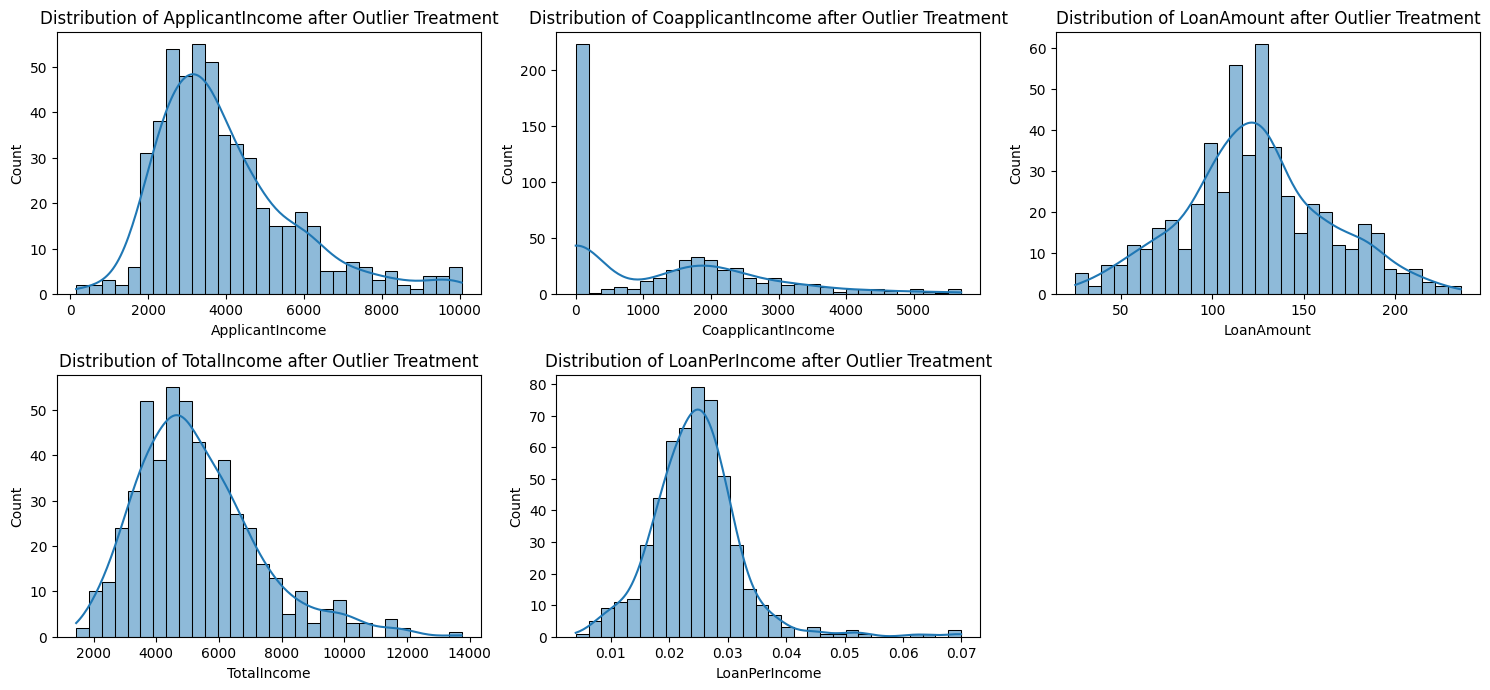

In [28]:
# visualizing the skewness after outlier treatment using histograms
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sadeniji_loan_data[var], bins=30, kde=True)
    plt.title(f"Distribution of {var} after Outlier Treatment")
plt.tight_layout()
plt.show()

In [29]:
print(numerical_variables)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'LoanPerIncome']


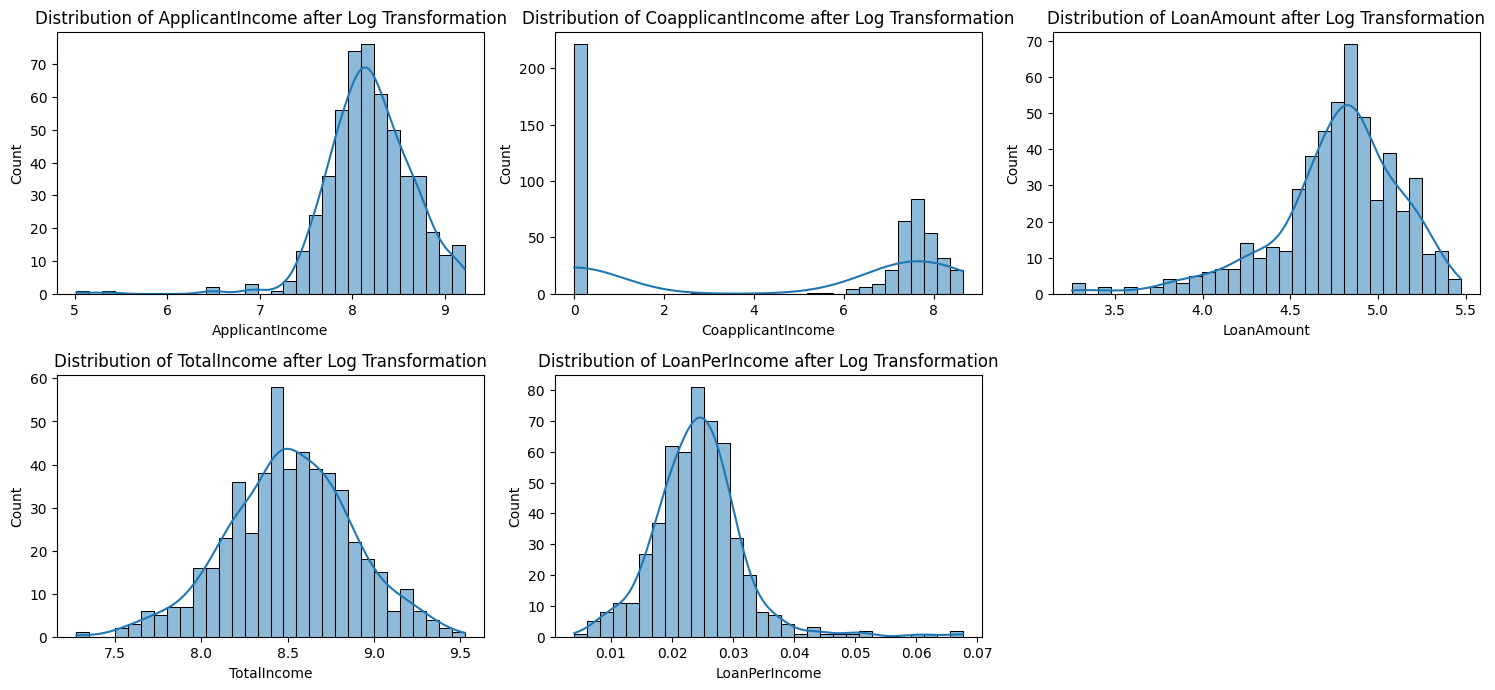

In [30]:
# Apply log transformation on numerical variables 
for var in numerical_variables:
    sadeniji_loan_data[var] = np.log1p(sadeniji_loan_data[var])
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_variables):
    plt.subplot(3, 3, i + 1)
    sns.histplot(sadeniji_loan_data[var], bins=30, kde=True)
    plt.title(f"Distribution of {var} after Log Transformation")
plt.tight_layout()
plt.show()

In [31]:
# Print the values of skewness after log transformation
skewness_after_log_transformation = sadeniji_loan_data[numerical_variables].skew()
print("Skewness of Numerical Variables after Log Transformation:\n", skewness_after_log_transformation)

Skewness of Numerical Variables after Log Transformation:
 ApplicantIncome     -1.050365
CoapplicantIncome   -0.270076
LoanAmount          -1.083667
TotalIncome         -0.123300
LoanPerIncome        1.342050
dtype: float64


In [32]:
# Drop Loan_ID and other redundant columns
sadeniji_loan_data.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], inplace=True)

sadeniji_loan_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Gender            520 non-null    object  
 1   Married           520 non-null    object  
 2   Dependents        520 non-null    object  
 3   Education         520 non-null    object  
 4   Self_Employed     520 non-null    object  
 5   LoanAmount        520 non-null    float64 
 6   Loan_Amount_Term  520 non-null    category
 7   Credit_History    520 non-null    category
 8   Property_Area     520 non-null    object  
 9   Loan_Status       520 non-null    object  
 10  TotalIncome       520 non-null    float64 
 11  LoanPerIncome     520 non-null    float64 
dtypes: category(2), float64(3), object(7)
memory usage: 46.2+ KB


In [33]:
le = LabelEncoder()
sadeniji_loan_data['Loan_Status'] = le.fit_transform(sadeniji_loan_data['Loan_Status'])

# Label encode ordinal variable (Dependents)
sadeniji_loan_data['Dependents'] = sadeniji_loan_data['Dependents'].replace({'3+': 3}).astype(int)

# Convert Loan_Amount_Term to ordered categorical
sadeniji_loan_data['Loan_Amount_Term'] = pd.Categorical(
    sadeniji_loan_data['Loan_Amount_Term'],
    categories=sorted(sadeniji_loan_data['Loan_Amount_Term'].unique()),
    ordered=True
)

sadeniji_loan_data['Loan_Amount_Term_encoded'] = sadeniji_loan_data['Loan_Amount_Term'].cat.codes


# One-Hot encode nominal variables
sadeniji_loan_data = pd.get_dummies(
    sadeniji_loan_data, 
    columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], 
    drop_first=True
)

scaler = RobustScaler()
num_cols = ['LoanAmount', 'TotalIncome', 'LoanPerIncome']
sadeniji_loan_data[num_cols] = scaler.fit_transform(sadeniji_loan_data[num_cols])

# drop the original Loan_Amount_Term column
sadeniji_loan_data.drop(columns=['Loan_Amount_Term'], inplace=True)


In [34]:
sadeniji_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Dependents                520 non-null    int64   
 1   LoanAmount                520 non-null    float64 
 2   Credit_History            520 non-null    category
 3   Loan_Status               520 non-null    int64   
 4   TotalIncome               520 non-null    float64 
 5   LoanPerIncome             520 non-null    float64 
 6   Loan_Amount_Term_encoded  520 non-null    int8    
 7   Gender_Male               520 non-null    bool    
 8   Married_Yes               520 non-null    bool    
 9   Education_Not Graduate    520 non-null    bool    
 10  Self_Employed_Yes         520 non-null    bool    
 11  Property_Area_Semiurban   520 non-null    bool    
 12  Property_Area_Urban       520 non-null    bool    
dtypes: bool(6), category(1), float64(3), int64(2), int8(1)


In [35]:
sadeniji_loan_data.head()

,Dependents,LoanAmount,Credit_History,Loan_Status,TotalIncome,LoanPerIncome,Loan_Amount_Term_encoded,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,0.098296,1.0,1,0.352446,-0.316837,8,True,False,False,False,False,True
1,1,0.098296,1.0,0,0.437349,-0.424414,8,True,True,False,False,False,False
2,0,-1.530709,1.0,1,-1.045668,-0.302502,8,True,True,False,True,False,True
3,0,-0.060899,1.0,1,-0.000847,-0.020057,8,True,True,True,False,False,True
4,0,0.337044,1.0,1,0.405825,-0.117146,8,True,False,False,False,False,True


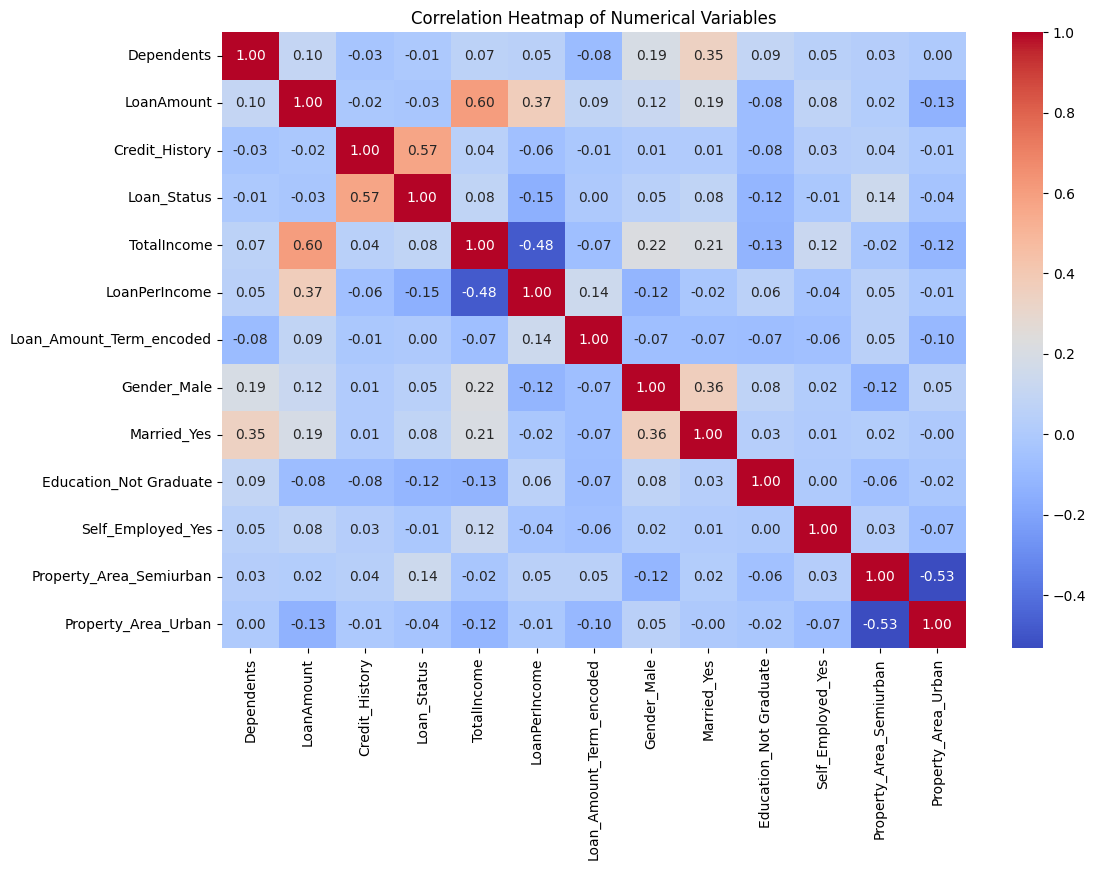

In [36]:
# plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sadeniji_loan_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Question 4


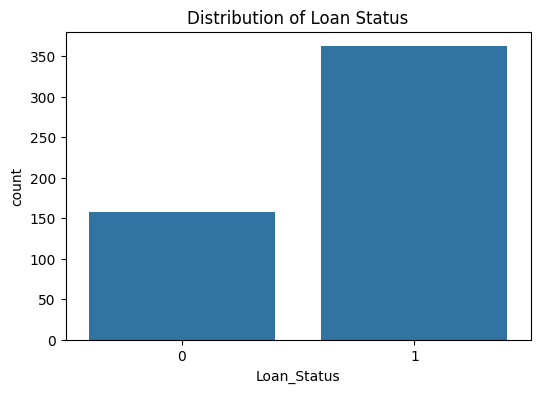

Distribution of Loan Status:
 Loan_Status
1    362
0    158
Name: count, dtype: int64


In [37]:
# plot the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=sadeniji_loan_data)
plt.title("Distribution of Loan Status")
plt.show()

#print the distribution of the target variable
loan_status_counts = sadeniji_loan_data['Loan_Status'].value_counts()
print("Distribution of Loan Status:\n", loan_status_counts)

In [38]:
# Split the data into features and target variable
X = sadeniji_loan_data.drop('Loan_Status', axis=1)
y = sadeniji_loan_data['Loan_Status']


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


🔹 Logistic Regression Evaluation
Mean CV Accuracy: 0.780 ± 0.034
Precision: 0.798
Recall: 0.813
F1-Score: 0.806
ROC-AUC: 0.682

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56        49
           1       0.80      0.81      0.81       107

    accuracy                           0.73       156
   macro avg       0.69      0.68      0.68       156
weighted avg       0.73      0.73      0.73       156



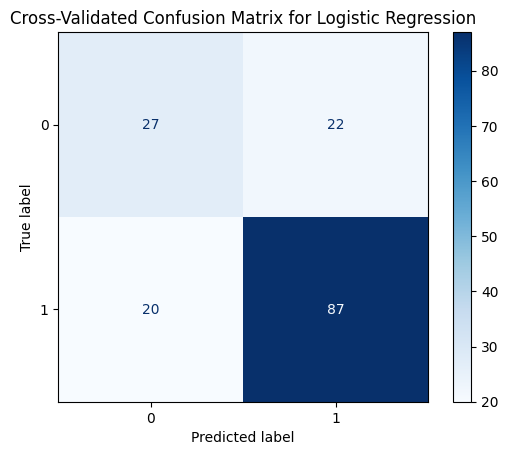


🔹 SVM Evaluation
Mean CV Accuracy: 0.821 ± 0.034
Precision: 0.820
Recall: 0.935
F1-Score: 0.873
ROC-AUC: 0.743

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.55      0.65        49
           1       0.82      0.93      0.87       107

    accuracy                           0.81       156
   macro avg       0.81      0.74      0.76       156
weighted avg       0.81      0.81      0.80       156



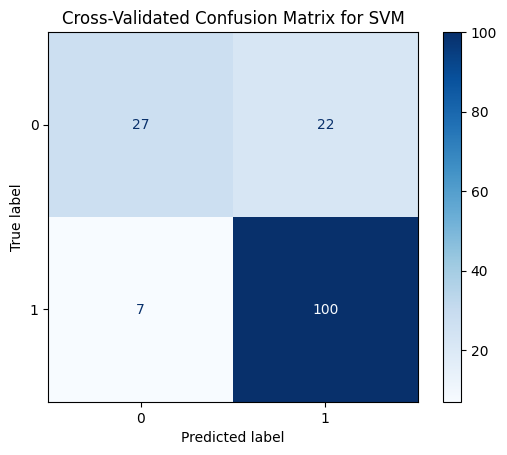


🔹 SGD Classifier Evaluation
Mean CV Accuracy: 0.616 ± 0.158
Precision: 0.771
Recall: 0.785
F1-Score: 0.778
ROC-AUC: 0.637

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        49
           1       0.77      0.79      0.78       107

    accuracy                           0.69       156
   macro avg       0.64      0.64      0.64       156
weighted avg       0.69      0.69      0.69       156



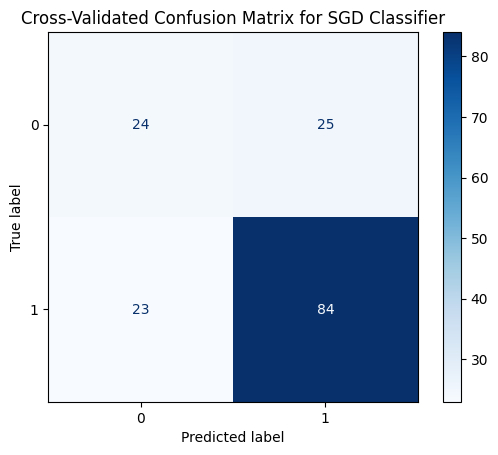

In [39]:
# Define models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
sadeniji_svm = SVC(probability=True, class_weight='balanced')
sadeniji_sdg = SGDClassifier(max_iter=1000, tol=1e-3, class_weight='balanced')

models = {
    'Logistic Regression': log_reg,
    'SVM': sadeniji_svm,
    'SGD Classifier': sadeniji_sdg
}

# Evaluate models using Cross-Validation
for model_name, model in models.items():
    print(f"\n🔹 {model_name} Evaluation")
    
    #Cross-validated accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Mean CV Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")
    
    #Cross-validated predictions (for confusion matrix)
    y_pred_cv = cross_val_predict(model, X_test, y_test, cv=5)
    
    # Classification metrics
    precision = precision_score(y_test, y_pred_cv)
    recall = recall_score(y_test, y_pred_cv)
    f1 = f1_score(y_test, y_pred_cv)
    roc_auc = roc_auc_score(y_test, y_pred_cv)

    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    # Detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred_cv))
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred_cv)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Cross-Validated Confusion Matrix for {model_name}')
    plt.show()
    


## Question 5

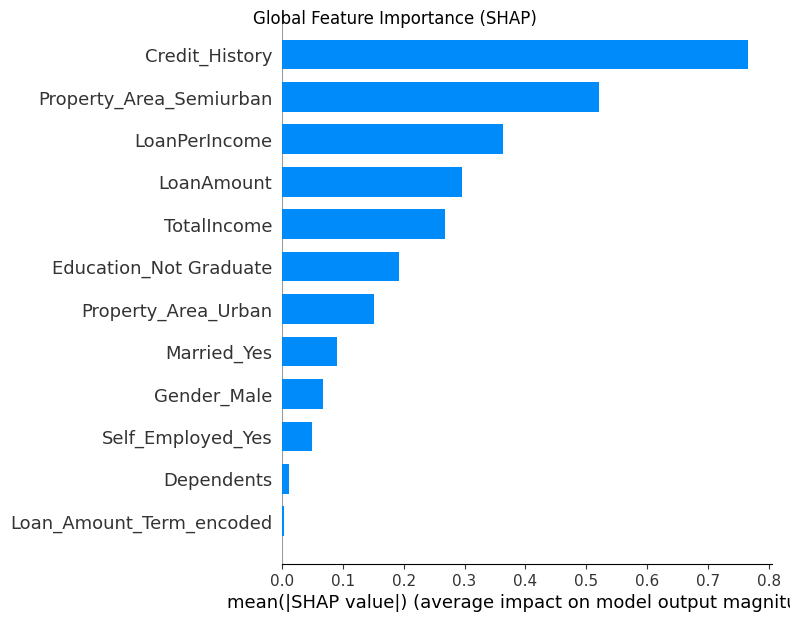

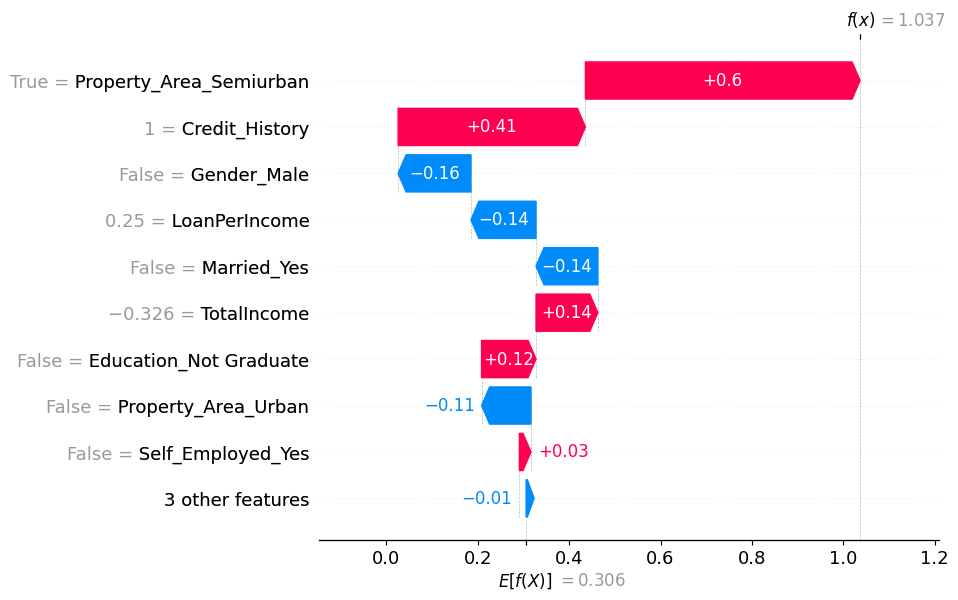

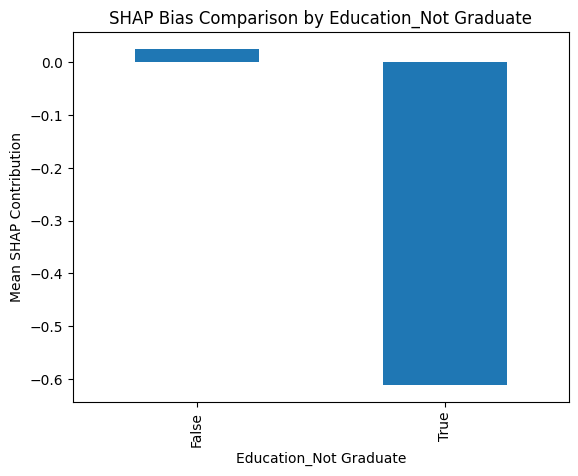


Average SHAP contribution by group:
Education_Not Graduate
False    0.025175
True    -0.611299
Name: shap_sum, dtype: object


In [ ]:
import shap
import matplotlib.pyplot as plt

# fit logistic regression 
best_model = log_reg
best_model.fit(X_train, y_train)

# Compute SHAP values

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train)  


# Global Feature Importance Plot

shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.suptitle("Global Feature Importance (SHAP)")
plt.show()


# Local Explanation (Waterfall for one instance)
sample_index = 10

#  Construct proper SHAP Explanation object manually
exp = shap.Explanation(
    values = shap_values.values[sample_index],
    base_values = shap_values.base_values[sample_index],
    data = X_train.iloc[sample_index],
    feature_names = X_train.columns
)

# Plot waterfall
shap.plots.waterfall(exp, max_display=10)
plt.show()


# Bias Check: Compare SHAP contributions across groups

group_feature = "Education_Not Graduate"

# Create SHAP sum column
X_train_with_shap = X_train.copy()
X_train_with_shap["shap_sum"] = shap_values.values.sum(axis=1)

# Group comparison
shap_bias = X_train_with_shap.groupby(group_feature)["shap_sum"].mean()

# Plot
shap_bias.plot(kind="bar")
plt.ylabel("Mean SHAP Contribution")
plt.title(f"SHAP Bias Comparison by {group_feature}")
plt.show()

# Print numeric values
print("\nAverage SHAP contribution by group:")
print(shap_bias)
